<a href="https://colab.research.google.com/github/levyssouto/Python-codes/blob/main/Atividades_IA/Atividade_Pr%C3%A1tica_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #conecta Google colab ao Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install pandas_profiling 

In [3]:
#!pip install sweetviz

In [42]:
import pandas as pd #importa bibliotecas necessárias à Análise de Dados 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
#from pandas_profiling import ProfileReport


# **TRATAMENTO DE DADOS E ANÁLISE EXPLORATÓRIA**

In [5]:
path = '/content/drive/MyDrive/Atividades_IA/base_arrumada.csv'

def inicia_dataset(path): #função para iniciar o dataset ou reiniciar caso necessário
  reclamacoes = pd.read_csv(path,sep=';',on_bad_lines='skip') #exclui badlines devido ao erro de tokenização
  return reclamacoes

reclamacoes=inicia_dataset(path) #inicia e reinicia dataset  

In [6]:
print("Formato do dataset: ",reclamacoes.shape) 
reclamacoes.head()

Formato do dataset:  (113466, 25)


,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,Unnamed: 23,Unnamed: 24
0,2017,2017-03-14 15:17:52.000,2015-04-13 15:58:14.000,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,ASSURANT SEGURADORA S.A.,1,"3,8237E+12",...,S,122,Móveis Para Quarto,2338.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,75075560.0,NaN,NaN
1,2017,2017-03-14 15:17:52.000,2015-04-13 15:58:14.000,5,Centro-oeste,GO,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NOVO MUNDO,1,"1,53408E+12",...,S,122,Móveis Para Quarto,2338.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,75075560.0,NaN,NaN
2,2017,2017-03-03 14:00:12.000,2015-04-13 17:03:21.000,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,ASSURANT SEGURADORA S.A.,1,"3,8237E+12",...,S,92,Máquina de Lavar Roupa / Louça e Secadora,2493.0,Produto com vício,F,Nao Informada,75000000.0,NaN,NaN
3,2017,2017-03-03 14:00:12.000,2015-04-13 17:03:21.000,5,Centro-oeste,GO,NOVO MUNDO MOVEIS E UTILIDADES LTDA,NOVO MUNDO,1,"1,53408E+12",...,S,92,Máquina de Lavar Roupa / Louça e Secadora,2493.0,Produto com vício,F,Nao Informada,75000000.0,NaN,NaN
4,2017,2017-12-12 14:40:31.000,2015-04-14 09:06:13.000,1,Norte,TO,BANCO BRADESCO FINANCIAMENTOS S.A.,BANCO BRADESCO FINANCIAMENTOS S.A.,1,"7,208E+12",...,N,53,Banco comercial,6915.0,Crédito Consignado,M,entre 51 a 60 anos,77970000.0,NaN,NaN


In [7]:
#Verificar tipos de dados de cada coluna e a quantidade de valores não nulos 
print("Tipos de dados das colunas: \n")
reclamacoes.info()

Tipos de dados das colunas: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113466 entries, 0 to 113465
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          113466 non-null  int64  
 1   DataArquivamento       113443 non-null  object 
 2   DataAbertura           113456 non-null  object 
 3   CodigoRegiao           113466 non-null  int64  
 4   Regiao                 113466 non-null  object 
 5   UF                     113466 non-null  object 
 6   strRazaoSocial         113463 non-null  object 
 7   strNomeFantasia        93722 non-null   object 
 8   Tipo                   113466 non-null  object 
 9   NumeroCNPJ             107333 non-null  object 
 10  RadicalCNPJ            107096 non-null  object 
 11  RazaoSocialRFB         97982 non-null   object 
 12  NomeFantasiaRFB        48016 non-null   object 
 13  CNAEPrincipal          97969 non-null   object 
 14  DescCN

In [8]:
print("Quantidade de valores faltantes no Dataset: \n") # verifica valores NULL
reclamacoes.isna().sum() #Eliminar arquivamento, abertura, faixa etaria, codigo assunto

Quantidade de valores faltantes no Dataset: 



AnoCalendario                 0
DataArquivamento             23
DataAbertura                 10
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                3
strNomeFantasia           19744
Tipo                          0
NumeroCNPJ                 6133
RadicalCNPJ                6370
RazaoSocialRFB            15484
NomeFantasiaRFB           65450
CNAEPrincipal             15497
DescCNAEPrincipal         16036
Atendida                      0
CodigoAssunto                14
DescricaoAssunto             14
CodigoProblema            64830
DescricaoProblema         64854
SexoConsumidor               70
FaixaEtariaConsumidor        11
CEPConsumidor             11983
Unnamed: 23              113423
Unnamed: 24              113446
dtype: int64

ANÁLISE PANDAS PROFILING


### **ESTATÍSTICA DESCRITIVA E PREPARAÇÃO DE DADOS**

> Bloco com recuo



In [79]:
#Tirar colunas não necessárias á estatística descritiva
#excluir colunas com valores nominais
reclamacoes = inicia_dataset(path)
rec_estatistica = reclamacoes
remove_colunas = ["Tipo","CodigoProblema","strRazaoSocial","NumeroCNPJ","RadicalCNPJ","RazaoSocialRFB",
                  "NomeFantasiaRFB","CNAEPrincipal","DescCNAEPrincipal",
                  "CEPConsumidor","Unnamed: 23","Unnamed: 24"]
rec_estatistica.drop(remove_colunas,axis='columns',inplace=True)


In [80]:
#CONVERTER CAMPOS DE DATA DE INT PARA CHAR E DE CHAR PARA DATETIME
rec_estatistica['DataAbertura'] = pd.to_datetime(rec_estatistica['DataAbertura']) #converte pra datetime
rec_estatistica['DataAbertura'] = rec_estatistica['DataAbertura'].dt.strftime('%Y-%m-%d') #converte de volta pra string
rec_estatistica['DataAbertura'] = pd.to_datetime(rec_estatistica['DataAbertura']) #converte pra datetime
 

rec_estatistica['DataArquivamento'] = pd.to_datetime(rec_estatistica['DataArquivamento'])
rec_estatistica['DataArquivamento'] = rec_estatistica['DataArquivamento'].dt.strftime('%Y-%m-%d')
rec_estatistica['DataArquivamento'] = pd.to_datetime(rec_estatistica['DataArquivamento'])

rec_estatistica.info() # DataArquivamento e DataAbertura foram convertidos para datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113466 entries, 0 to 113465
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AnoCalendario          113466 non-null  int64         
 1   DataArquivamento       113443 non-null  datetime64[ns]
 2   DataAbertura           113456 non-null  datetime64[ns]
 3   CodigoRegiao           113466 non-null  int64         
 4   Regiao                 113466 non-null  object        
 5   UF                     113466 non-null  object        
 6   strNomeFantasia        93722 non-null   object        
 7   Atendida               113466 non-null  object        
 8   CodigoAssunto          113452 non-null  object        
 9   DescricaoAssunto       113452 non-null  object        
 10  DescricaoProblema      48612 non-null   object        
 11  SexoConsumidor         113396 non-null  object        
 12  FaixaEtariaConsumidor  113455 non-null  obje

In [11]:
rec_estatistica.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strNomeFantasia,Atendida,CodigoAssunto,DescricaoAssunto,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor
0,2017,2017-03-14,2015-04-13,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,S,122,Móveis Para Quarto,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos
1,2017,2017-03-14,2015-04-13,5,Centro-oeste,GO,NOVO MUNDO,S,122,Móveis Para Quarto,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos
2,2017,2017-03-03,2015-04-13,5,Centro-oeste,GO,ASSURANT SEGURADORA S.A.,S,92,Máquina de Lavar Roupa / Louça e Secadora,Produto com vício,F,Nao Informada
3,2017,2017-03-03,2015-04-13,5,Centro-oeste,GO,NOVO MUNDO,S,92,Máquina de Lavar Roupa / Louça e Secadora,Produto com vício,F,Nao Informada
4,2017,2017-12-12,2015-04-14,1,Norte,TO,BANCO BRADESCO FINANCIAMENTOS S.A.,N,53,Banco comercial,Crédito Consignado,M,entre 51 a 60 anos


In [12]:
#Cria Análise do Dataset completo e deixa um arquivo .html na pasta para visualização
#profile = ProfileReport(rec_estatistica,title='Análise Exploratória')
#profile.to_file("rec_estatistica.html")

In [13]:
#report_sv = sv.analyze(rec_estatistica)
#report_sv.show_html("sw.html")

In [14]:
#procurando correlações, agrupando solicitações atendidas por regiao
print("QUANTIDADE DE RECLAMAÇÕES ATENDIDAS POR ESTADO: \n")
rec_estatistica.groupby(['UF','Regiao'])['AnoCalendario'].count()

QUANTIDADE DE RECLAMAÇÕES ATENDIDAS POR ESTADO: 



UF  Regiao      
BA  Nordeste           25
CE  Nordeste         1971
ES  Sudeste          2768
GO  Centro-oeste    16440
MA  Nordeste          216
MG  Sudeste          8098
MS  Centro-oeste     6926
MT  Centro-oeste     7485
PA  Norte             977
PB  Nordeste         1480
PE  Nordeste          208
PI  Nordeste         2014
PR  Sul               875
RJ  Sudeste          3612
RN  Nordeste         7786
RO  Norte            6195
RS  Sul               138
SC  Sul              4860
SP  Sudeste         41003
TO  Norte             389
Name: AnoCalendario, dtype: int64

In [15]:
#empresa com mais reclamações: telefonia/vivo, problema mais recorrente: produto com vício, ano com mais reclamações: 2017
print("Tema com mais reclamações: ",rec_estatistica['DescricaoAssunto'].mode(),"\n")
print("Empresa com mais reclamações: ",rec_estatistica['strNomeFantasia'].mode(),"\n")
print("Problema mais recorrente: ",rec_estatistica['DescricaoProblema'].mode(),"\n")
print("Ano com mais reclamações: ",rec_estatistica['AnoCalendario'].mode(),"\n")

Tema com mais reclamações:  0    Telefone ( Convencional, Celular, Interfone, E...
Name: DescricaoAssunto, dtype: object 

Empresa com mais reclamações:  0    VIVO/TELEFÔNICA
Name: strNomeFantasia, dtype: object 

Problema mais recorrente:  0    Produto com vício
Name: DescricaoProblema, dtype: object 

Ano com mais reclamações:  0    2017
Name: AnoCalendario, dtype: int64 



array([[<Axes: title={'center': 'Atendida'}>]], dtype=object)

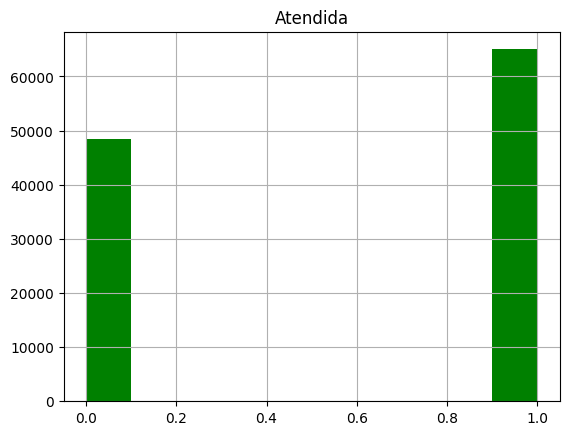

In [16]:
rec_estatistica['Atendida'] = rec_estatistica['Atendida'].map({'S' : 1, 'N': 0}) #gráfico de quantidade de pessoas atendidas e não atendidas, mapeando sim 1 0 não
rec_estatistica.hist(column='Atendida',color='green')

**CRIAR VARIÁVEL DEPENDENTE**

In [81]:
#excluir colunas com valores nominais
remove_colunas_2 = ["UF","strNomeFantasia","DescricaoAssunto","DescricaoProblema","Regiao"]
r_variavel=rec_estatistica
r_variavel.drop(remove_colunas_2,axis='columns',inplace=True) #remove colunas com atributos nominais

In [82]:
r_variavel['Atendida'].replace(to_replace='S',value=1,inplace=True) # SIM 1
r_variavel['Atendida'].replace(to_replace='N',value=0,inplace=True) # NÃO 0

r_variavel['SexoConsumidor'].replace(to_replace='F',value=1,inplace=True) # FEMININO 1 
r_variavel['SexoConsumidor'].replace(to_replace='M',value=0,inplace=True) # MASCULINO 0 


r_variavel['Dias'] = (r_variavel['DataArquivamento'] - r_variavel['DataAbertura']).dt.days #calcula dias e cria uma nova coluna


r_variavel.head()


,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Dias
0,2017,2017-03-14,2015-04-13,5,1,122,1,entre 51 a 60 anos,701.0
1,2017,2017-03-14,2015-04-13,5,1,122,1,entre 51 a 60 anos,701.0
2,2017,2017-03-03,2015-04-13,5,1,92,1,Nao Informada,690.0
3,2017,2017-03-03,2015-04-13,5,1,92,1,Nao Informada,690.0
4,2017,2017-12-12,2015-04-14,1,0,53,0,entre 51 a 60 anos,973.0


In [19]:
r_variavel.isna().sum() # conta a quantidade de valores
r_variavel.shape

(113466, 9)

In [83]:
r_variavel.replace("NULL",np.nan,inplace=True)
r_variavel.replace("Nao Informada",np.nan,inplace=True)
r_variavel.replace(["Desistência de compra (cancelamento de compra)","Produto com vício",
                    "Contrato/pedido/orçamento (rescisão, descumprimento, erro, etc.)","Produto entregue incompleto",
                    "SAC - Cancelamento de serviço (retenção, demora, não envio do comprovante)","Cobrança indevida/abusiva"],np.nan,inplace=True)
r_variavel.dropna(inplace=True)

#substitui valores nulos e errados no Dataset por NaN e exclui os registros

r_variavel['Dias'] = r_variavel['Dias'].astype(int) #substitui float por int na coluna de qtd de dias

r_variavel.drop(["DataArquivamento","DataAbertura"],axis='columns',inplace=True) #remove datas de colunas

print("formato atual dataset, sem valores nulos")
print(r_variavel.shape)
r_variavel.info()

formato atual dataset, sem valores nulos
(103748, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103748 entries, 0 to 113465
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   AnoCalendario          103748 non-null  int64 
 1   CodigoRegiao           103748 non-null  int64 
 2   Atendida               103748 non-null  object
 3   CodigoAssunto          103748 non-null  object
 4   SexoConsumidor         103748 non-null  object
 5   FaixaEtariaConsumidor  103748 non-null  object
 6   Dias                   103748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.3+ MB


In [84]:
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='até 20 anos',value=0,inplace=True) #substitui faixas etárias por classificação numérica
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='entre 21 a 30 anos',value=1,inplace=True)
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='entre 31 a 40 anos',value=2,inplace=True)
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='entre 41 a 50 anos',value=3,inplace=True)
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='entre 51 a 60 anos',value=4,inplace=True)
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='entre 61 a 70 anos',value=5,inplace=True)
r_variavel['FaixaEtariaConsumidor'].replace(to_replace='mais de 70 anos',value=6,inplace=True)

'''Classificação Faixa Etária 
    0 : até 20 anos
    1 : entre 21 a 30 anos  
    2 : entre 31 a 40 anos
    3 : entre 41 a 50 anos
    4 : entre 51 a 60 anos
    5 : entre 61 a 70 anos
    6 : mais de 70 anos
'''

'Classificação Faixa Etária \n    0 : até 20 anos\n    1 : entre 21 a 30 anos  \n    2 : entre 31 a 40 anos\n    3 : entre 41 a 50 anos\n    4 : entre 51 a 60 anos\n    5 : entre 61 a 70 anos\n    6 : mais de 70 anos\n'

TREINO E TESTE


In [22]:
r_variavel.head() # criar faixas de valores por dias a cada 180(semestre), classificar códigos do assunto

,AnoCalendario,CodigoRegiao,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Dias
0,2017,5,1.0,122,1,4,701
1,2017,5,1.0,122,1,4,701
4,2017,1,0.0,53,0,4,973
6,2017,5,1.0,94,1,4,689
7,2017,5,1.0,94,1,4,689


In [85]:
#CATEGORIZANDO CODIGO ASSUNTO
alimentos = []
x = range(1,46)
for n in x:
  alimentos.append(n)

alimentos.append(50)
alimentos.append(283)
#ALIMENTOS, BEBIDAS E DISTRIBUIDORAS = 1


financas = []
x = range(53,76)
for n in x:
  financas.append(n)

financas_faltantes=[78,79,85,86,135,144,147,229,231,280,282]
for n in financas_faltantes:
  financas.append(n)
#FINANCAS,SEGURO E CRÉDITO = 2

mobiliaria = []
x = range(80,85)
for n in x:
  mobiliaria.append(n)
mobiliaria.append(87)
#MOBILARIA E CONSTRUTORA  = 3

domesticos = [] 
x = range(92,99)
for n in x:
  domesticos.append(n)
x = range(100,105)
for n in x:
  domesticos.append(n)
x = range(110,113)
for n in x:
  domesticos.append(n)
x = range(120,129)
for n in x:
  domesticos.append(n)
x = range(139,144)
for n in x:
  domesticos.append(n)
domesticos.append(146)

# ARTIGOS DE CASA = 4

auto = [99,89,129,130,131,133,145]

# AUTOMOVEIS E AUTOPEÇAS = 5

art_lazer = [105,106,107,108,109]
x = range(245,249)
for n in x:
  art_lazer.append(n)

# ARTIGOS PARA LAZER = 6

saude = [230, 284, 285, 286]
x = range(199,225)
for n in x:
  saude.append(n)

# SAUDE = 7

art_pessoais = [132, 134, 287]

# ARTIGOS PESSOAIS = 8 

telecom = [136, 137, 186, 187, 188, 226, 227]

# TELECOMUNICAÇÕES E TELEMARKETING = 9

servicos = [281, 288]
x = range(156,186)
for n in x:
  servicos.append(n)
x = range(233,245)
for n in x:
  servicos.append(n)
x = range(249,280)
for n in x:
  servicos.append(n)

# SERVIÇOS = 10


outros = [76,77,84,88,90,91,113,114,138]

# OUTROS = 11

In [86]:
r_variavel['CodigoAssunto'].replace(to_replace=alimentos,value=1,inplace=True) #substitui códigos do assunto por classificação numérica
r_variavel['CodigoAssunto'].replace(to_replace=financas,value=2,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=mobiliaria,value=3,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=domesticos,value=4,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=auto,value=5,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=art_lazer,value=6,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=saude,value=7,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=art_pessoais,value=8,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=telecom,value=9,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=servicos,value=10,inplace=True) 
r_variavel['CodigoAssunto'].replace(to_replace=outros,value=11,inplace=True) 

In [87]:
# funcional mas gasta muita RAM
#semestres = list(map(lambda x : math.ceil(x / 180) if ((x / 180) - (x // 180) > 0.5) else math.floor(x / 180), dias))
# essa função pega a divisão do dia por 180 e subtrae o quociente da mesma operação
#resta apenas a parte decimal.caso o restante seja maior que 0.5 o número é arredondado para cima                                                                                                                        
#caso contrário, é arredondado para baixo

#dias = np.array(r_variavel['Dias'])
 #transforma coluna do dataframe em numpy array para que possa ser percorrido

#semestres = [math.ceil(x / 180) if (x % 180) > 90 else math.floor(x / 180) for x in dias] 
#usa list compreehension para percorrer valores de dias
#ao invés de varificar o resultado da divisão para arredondar, agor usamos operador % para verificar o resto, se maior que 90 arredonda pra cima, caso não
#arredonda pra baixo

#r_variavel['Dias'].replace(to_replace=dias,value=semestres,inplace=True) isso é o que gasta ram

In [88]:
dias = np.array(r_variavel['Dias']) 

import pickle
def salva_pickle(lista,nome_arquivo):   #função que salva a variavel no drive recebendo como parametro a variavel e o nome do arquivo
  with open('/content/drive/MyDrive/pickle_file/'+ nome_arquivo +'.pkl','wb') as arquivo: 
    pickle.dump(lista,arquivo)            
                                                    
def le_pickle(lista,nome_arquivo):    #função que le a variavel do drive e a retorna
  with open('/content/drive/MyDrive/pickle_file/'+ nome_arquivo +'.pkl','rb') as arquivo: 
    lista = pickle.load(arquivo)
    return lista


#salva_pickle(semestres,"semestres")# rodar apenas uma vez

semestres = 0 #reinicia a variavel semestres para ser lida. Sendo que semestres = [math.ceil(x / 180) if (x % 180) > 90 else math.floor(x / 180) for x in dias]

sem=le_pickle(semestres,"semestres")    

r_variavel['Dias'].replace(to_replace=dias,value=sem,inplace=True)

In [89]:
r_variavel.rename(columns={'Dias': 'Semestres'}, inplace = True) #semestres tem 25 classes distintas, de 0 a 24
''' CÓDIGO REGIÃO
1: Norte
2: Nordeste
3: Sudeste
4: Sul
5: Centro-Oeste
'''
r_variavel.head()

,AnoCalendario,CodigoRegiao,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Semestres
0,2017,5,1,4,1,4,4
1,2017,5,1,4,1,4,4
4,2017,1,0,2,0,4,5
6,2017,5,1,4,1,4,4
7,2017,5,1,4,1,4,4


Correlações

In [36]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1) #função para criar histogramas de correlação das colunas do dataset pela soma de valores mínimos
    return v
print("Histogramas de Correlação:")
r_variavel.corr(method=histogram_intersection)   

Histogramas de Correlação:


,AnoCalendario,CodigoRegiao,Atendida,FaixaEtariaConsumidor,Semestres
AnoCalendario,1.0,343884.0,59807.0,310106.0,94551.0
CodigoRegiao,343884.0,1.0,59807.0,242043.0,80807.0
Atendida,59807.0,59807.0,1.0,58458.0,30231.0
FaixaEtariaConsumidor,310106.0,242043.0,58458.0,1.0,69816.0
Semestres,94551.0,80807.0,30231.0,69816.0,1.0


In [41]:
r_variavel.corr().style.background_gradient(cmap='inferno') #mapa de correlação

,AnoCalendario,CodigoRegiao,Atendida,FaixaEtariaConsumidor,Semestres
AnoCalendario,1.000000,0.035471,-0.002583,0.063083,0.136611
CodigoRegiao,0.035471,1.000000,0.166623,-0.041332,0.240163
Atendida,-0.002583,0.166623,1.000000,0.003609,0.028887
FaixaEtariaConsumidor,0.063083,-0.041332,0.003609,1.000000,-0.041758
Semestres,0.136611,0.240163,0.028887,-0.041758,1.000000


<Axes: >

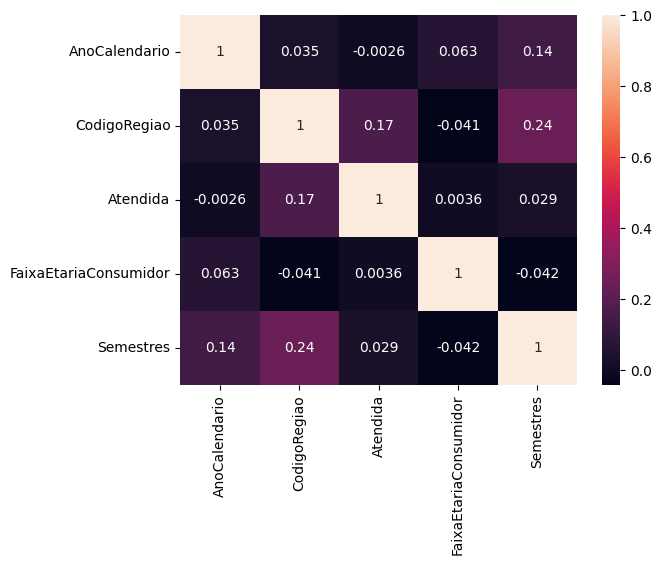

In [44]:
sns.heatmap(r_variavel.corr(),annot=True)

# **TREINO E TESTE**

In [28]:
r_treino = r_variavel #inicia nova variavel para treino e teste

In [29]:
r_treino.head()

,AnoCalendario,CodigoRegiao,Atendida,CodigoAssunto,SexoConsumidor,FaixaEtariaConsumidor,Semestres
0,2017,5,1.0,4,1,4,4
1,2017,5,1.0,4,1,4,4
4,2017,1,0.0,2,0,4,5
6,2017,5,1.0,4,1,4,4
7,2017,5,1.0,4,1,4,4


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(r_treino.drop(['Atendida'], axis=1), 
                                                   r_treino['Atendida'], test_size=0.30, 
                                                    random_state=100)

In [32]:
arvore = DecisionTreeClassifier(random_state=10)
modelo = arvore.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
previsoes[0:10]

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [33]:
cnf_matrix = confusion_matrix(y_test, previsoes, labels=[1,0])
print("Matriz de Confusão: \n")
cnf_matrix # Matriz de confusão

Matriz de Confusão: 



array([[12674,  5209],
       [ 5255,  7987]])

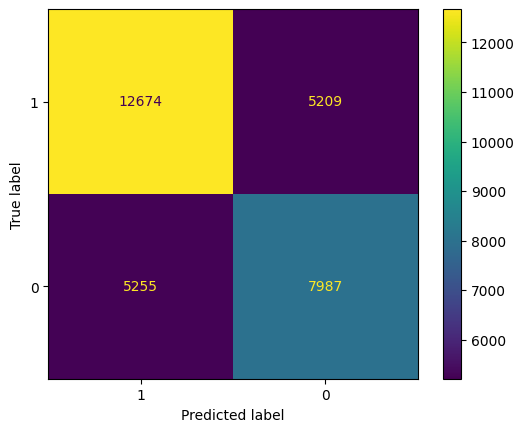

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, labels=[1,0])
plt.show()